In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The dataset for this project is taken from a research that helped build a classification model that can predict a fraudulent firm on the basis the present and historical risk factors. The dataset was made available through 2 csv files – audit_risk and trial. The audit_risk has 27 columns and trial has 18 columns. The 27 columns in audit_risk file are the following:
Sector_Score – Historical risk score value for each target sector.
LOCATION_ID – Unique ID of the city or province.
PARA_A - Discrepancy found in the planned expenditure of inspection and summary report A in Rs (in crore). 
SCORE_A, RISK_A – These columns can be derived from the PARA_A.
PARA_B - Discrepancy found in the unplanned expenditure of inspection and summary report B in Rs (in crore).
SCORE_B, RISK_B - These columns can be derived from the PARA_B.
TOTAL - Total amount of discrepancy found in other reports Rs (in crore).
numbers - Historical discrepancy score.
Score_B.1, Risk_C - These columns can be derived from the numbers.
Money_Value - Amount of money involved in misstatements in the past audits.
SCORE_MV, Risk_D - These columns can be derived from the Money_Value.   
District_Loss - Historical risk score of a district in the last 10 years.
PROB – probability of District_Loss.
Risk_E – It is the product of District_Loss and PROB.
History - Average historical loss suffered by firm in the last 10 years.
Prob – Probability of Historical Loss score.
Risk_F – It is the product of History and prob.
Score – It is a deciding factor in classifying a firm as ‘Fraud’ or ‘Not Fraud’, In the trial file, if the score is less than or equal to 2, the firm is labelled ‘Not Fraud’, if it is greater than 2, it is labelled ‘Fraud’.
Inherent_Risk - the risk present due to the discrepancies present in the transactions.
CONTROL_RISK - the risk due to the discrepancies which are left undetected by an internal control system.
Detection_Risk - risk of discrepancies present in the firm which are not even detected by the audit procedures.
Audit_Risk – It is the product of Inherent, control and detection risks.
Risk – It is dependent on Audit_Risk, If the Audit_Risk is less than or equal to 1, the firm is labelled ‘Not Fraud’ and if it is greater than 1, it is labelled ‘Fraud’.

The Score_A in Audit_Risk multiplied by 10 is the Score_A in trial. The same applies to Score_B. Audit_Risk dataset contains Risk_A(a derivative of PARA_A and Score_A) and Risk_B(a derivative of PARA_B and Score_B) which are not present in trial. TOTAL and numbers columns are identical in Audit_Risk and trial. Score_B.1 multiplied by 10 is the Marks column in trial. Audit_Risk has an extra column Risk_C( a derivative of numbers and Score_B.1) compared to trial. Score_MV in Audit_Risk multiplied by 10 is the Money_Marks column in trial dataset. Risk_D( a derivative of Money_Value and Score_MV) is absent in trial. PROB(probability of district loss score) in Audit_Risk multiplied by 10 is the Loss_Score in trial. prob(probability of historical loss score) in Audit_Risk multiplied by 10 is the History_Score in trial. Score is exactly identical in both Audit_risk and trial datasets. Risk column in trial is calculated based on Score value. 
The discrepancy in the Risk columns of Audit_Risk and trial datasets arises from the fact that Audit_Risk dataset uses Audit_Risk column(Product of Inherent_Risk, Controlled_Risk and Detection_Risk columns) to classify a firm as Fraud or otherwise.

In [2]:
Audit_Risk = pd.read_csv('audit_risk.csv')
Trials = pd.read_csv('trial.csv')

In [3]:
Audit_Risk.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [4]:
Audit_Risk.shape

(776, 27)

In [5]:
#Checking the null values in Audit_Risk and Trials
Audit_Risk.isnull().any()

Sector_score      False
LOCATION_ID       False
PARA_A            False
Score_A           False
Risk_A            False
PARA_B            False
Score_B           False
Risk_B            False
TOTAL             False
numbers           False
Score_B.1         False
Risk_C            False
Money_Value        True
Score_MV          False
Risk_D            False
District_Loss     False
PROB              False
RiSk_E            False
History           False
Prob              False
Risk_F            False
Score             False
Inherent_Risk     False
CONTROL_RISK      False
Detection_Risk    False
Audit_Risk        False
Risk              False
dtype: bool

In [6]:
len(Audit_Risk) - Audit_Risk.count()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [7]:
Trials.isnull().any()

Sector_score     False
LOCATION_ID      False
PARA_A           False
SCORE_A          False
PARA_B           False
SCORE_B          False
TOTAL            False
numbers          False
Marks            False
Money_Value       True
MONEY_Marks      False
District         False
Loss             False
LOSS_SCORE       False
History          False
History_score    False
Score            False
Risk             False
dtype: bool

In [8]:
len(Trials) - Trials.count()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [9]:
audit_columns = set(Audit_Risk.columns)
trial_colums = set(Trials.columns)

audit_columns.intersection(trial_colums)


{'History',
 'LOCATION_ID',
 'Money_Value',
 'PARA_A',
 'PARA_B',
 'Risk',
 'Score',
 'Sector_score',
 'TOTAL',
 'numbers'}

In [10]:
Trials=Trials.drop_duplicates(keep='first')
Audit_Risk=Audit_Risk.drop_duplicates(keep='first')
Trials['Risk']
Trials = Trials.rename(columns={'Risk': 'Risk_trial'})

In [11]:
#merging the Audit_Risk and Trials on common columns
merged = Audit_Risk.merge(Trials, how = 'inner', on = ['History', 'LOCATION_ID', 'Money_Value','PARA_A','PARA_B','Score','Sector_score','TOTAL','numbers'], sort = False)

In [12]:
merged.shape

(763, 36)

In [13]:
#Checking for null values in the merged dataset
merged.isnull().any()

Sector_score      False
LOCATION_ID       False
PARA_A            False
Score_A           False
Risk_A            False
PARA_B            False
Score_B           False
Risk_B            False
TOTAL             False
numbers           False
Score_B.1         False
Risk_C            False
Money_Value        True
Score_MV          False
Risk_D            False
District_Loss     False
PROB              False
RiSk_E            False
History           False
Prob              False
Risk_F            False
Score             False
Inherent_Risk     False
CONTROL_RISK      False
Detection_Risk    False
Audit_Risk        False
Risk              False
SCORE_A           False
SCORE_B           False
Marks             False
MONEY_Marks       False
District          False
Loss              False
LOSS_SCORE        False
History_score     False
Risk_trial        False
dtype: bool

Money_Value is the only column that has a null value.

In [14]:
#Replacing the string values in the LOCATION_ID column
#merged = merged.replace(['LOHARU', 'NUH', 'SAFIDON'], [0,0,0])
merged = merged[merged['LOCATION_ID']!='LOHARU']
merged = merged[merged['LOCATION_ID']!='NUH']
merged = merged[merged['LOCATION_ID']!='SAFIDON']

In [15]:
#Converting the LOCATION_ID column with replaced string values to a float column
merged['LOCATION_ID'] = merged['LOCATION_ID'].astype(float)

In [16]:
#Imputing the missing value in the Money_Value column
merged['Money_Value'] = merged['Money_Value'].replace('', np.nan)
merged['Money_Value'] = merged['Money_Value'].replace(np.nan,merged.Money_Value.mean())


In [17]:
#Checking if the null values in Money_Value are replaced
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 762
Data columns (total 36 columns):
Sector_score      760 non-null float64
LOCATION_ID       760 non-null float64
PARA_A            760 non-null float64
Score_A           760 non-null float64
Risk_A            760 non-null float64
PARA_B            760 non-null float64
Score_B           760 non-null float64
Risk_B            760 non-null float64
TOTAL             760 non-null float64
numbers           760 non-null float64
Score_B.1         760 non-null float64
Risk_C            760 non-null float64
Money_Value       760 non-null float64
Score_MV          760 non-null float64
Risk_D            760 non-null float64
District_Loss     760 non-null int64
PROB              760 non-null float64
RiSk_E            760 non-null float64
History           760 non-null int64
Prob              760 non-null float64
Risk_F            760 non-null float64
Score             760 non-null float64
Inherent_Risk     760 non-null float64
CO

In [18]:
merged.describe()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk_trial
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,...,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,19.791303,14.913158,2.499382,0.354474,1.378992,11.026830,0.315526,6.467250,13.493844,5.069079,...,0.400000,3.544737,3.155263,2.242105,2.928947,2.510526,0.030263,2.063158,2.171053,0.638158
std,24.154233,9.935912,5.728092,0.174474,3.471049,50.584064,0.170780,30.373976,51.815320,0.267037,...,0.490221,1.744738,1.707798,0.811197,1.608673,1.233009,0.186161,0.378904,0.686558,0.480850
min,1.850000,1.000000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,...,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,8.000000,0.257500,0.200000,0.051500,0.000000,0.200000,0.000000,0.597500,5.000000,...,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,13.000000,0.915000,0.200000,0.183000,0.455000,0.200000,0.091000,1.430000,5.000000,...,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000
75%,55.570000,19.000000,2.525000,0.600000,1.515000,4.482500,0.400000,2.113500,8.072500,5.000000,...,1.000000,6.000000,4.000000,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000,1.000000
max,59.850000,44.000000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,...,1.000000,6.000000,6.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000,1.000000


Scaling is an essential step before fitting the models as most estimators are developed with an assumption that the features involved vary on a comparable scale. We believe checking for outliers and knowing the distribution of data will help us decide on the type of scaling to be used.

In [19]:
#Checking for outliers in the merged dataframe for deciding on the type of scaling to be used
from numpy import mean
from numpy import std

for i in merged:
    data_mean, data_std = mean(merged[i]), std(merged[i])
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers = [x for x in merged[i] if x < lower or x > upper]
    print('Identified outliers in ' + i + ': %d' % len(outliers))

Identified outliers in Sector_score: 0
Identified outliers in LOCATION_ID: 0
Identified outliers in PARA_A: 7
Identified outliers in Score_A: 0
Identified outliers in Risk_A: 7
Identified outliers in PARA_B: 1
Identified outliers in Score_B: 0
Identified outliers in Risk_B: 1
Identified outliers in TOTAL: 2
Identified outliers in numbers: 22
Identified outliers in Score_B.1: 22
Identified outliers in Risk_C: 22
Identified outliers in Money_Value: 6
Identified outliers in Score_MV: 0
Identified outliers in Risk_D: 6
Identified outliers in District_Loss: 0
Identified outliers in PROB: 22
Identified outliers in RiSk_E: 6
Identified outliers in History: 15
Identified outliers in Prob: 15
Identified outliers in Risk_F: 15
Identified outliers in Score: 0
Identified outliers in Inherent_Risk: 7
Identified outliers in CONTROL_RISK: 15
Identified outliers in Detection_Risk: 0
Identified outliers in Audit_Risk: 6
Identified outliers in Risk: 0
Identified outliers in SCORE_A: 0
Identified outlier

In [20]:
merged_columns = list(merged.columns)

C:\Users\lavan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\lavan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\lavan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\lavan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


(0, 10)

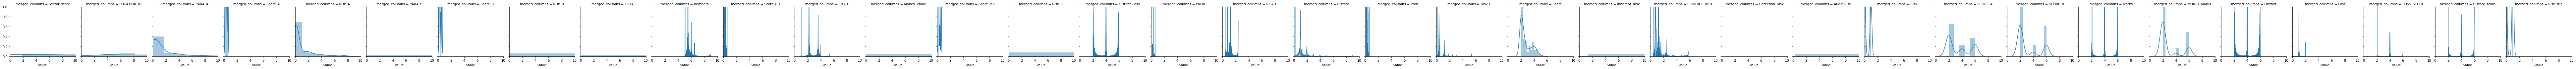

In [21]:
merged_distplots = pd.DataFrame(merged, columns = merged_columns)
merged_distplots_melt = merged_distplots.melt(var_name='merged_columns')
merged_distplots = sns.FacetGrid(merged_distplots_melt, col='merged_columns')
merged_distplots = (merged_distplots.map(sns.distplot, 'value'))
axes = merged_distplots.axes
axes[0,0].set_ylim(0,1)
axes[0,0].set_xlim(0,10)

Since it is evident from the above distribution plots that the distribution of data is not Gaussian, MinMax Scaler is a better fit for our data. After MinMax scaling, we have smaller standard deviations in our data and we therefore end up with suppressed effect of outliers.

In the research this dataset is taken from, Particle Swarm optimization(PSO) is used for feature extraction. PSO is used to minimize the total root of squared differences between Audit risk and total of product of features and their respective weights. After running the PSO to minimize the above value, the final formula derived reveals that Fraud is functionally dependent on the following columns:
PARA_A, PARA_B, numbers, Money_Value, Sector_score, History, District, Loss

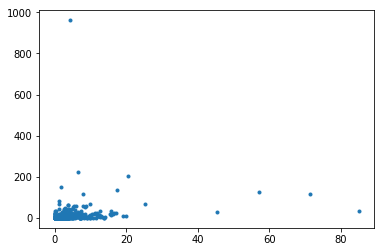

In [22]:
plt.plot(merged['PARA_A'],merged['Audit_Risk'],'.')

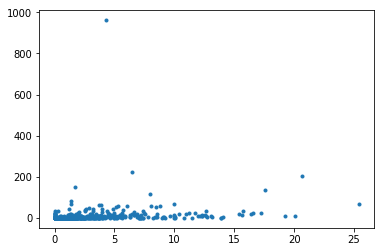

In [23]:
merged=merged[abs(merged['PARA_A'])<40]
plt.plot(merged['PARA_A'],merged['Audit_Risk'],'.')

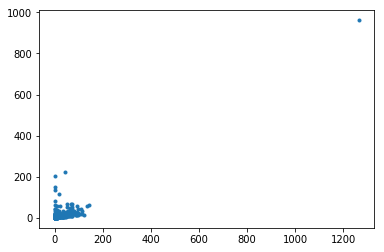

In [24]:
plt.plot(merged['PARA_B'],merged['Audit_Risk'],'.')

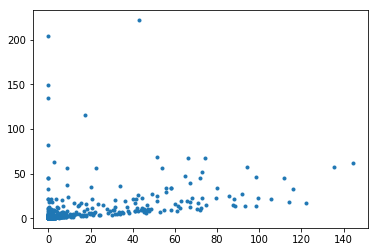

In [25]:
merged=merged[abs(merged['PARA_B'])<200]
plt.plot(merged['PARA_B'],merged['Audit_Risk'],'.')

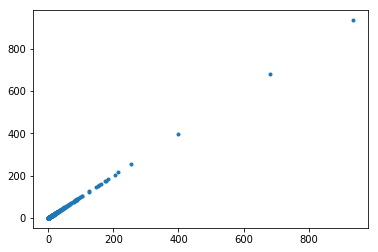

In [26]:
plt.plot(merged['Money_Value'],merged['Money_Value'],'.')

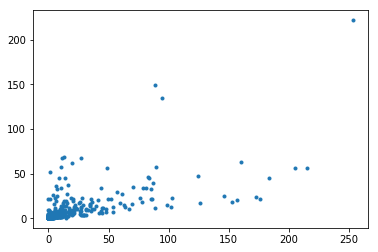

In [27]:
merged=merged[abs(merged['Money_Value'])<300]
plt.plot(merged['Money_Value'],merged['Audit_Risk'],'.')

In [28]:
data = merged[['Sector_score','numbers','PARA_A', 'PARA_B',
       'TOTAL','Money_Value', 'Prob', 'Marks', 'District_Loss', 'Loss','History_score', 'Audit_Risk']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000224617108D0>,
      dtype=object)

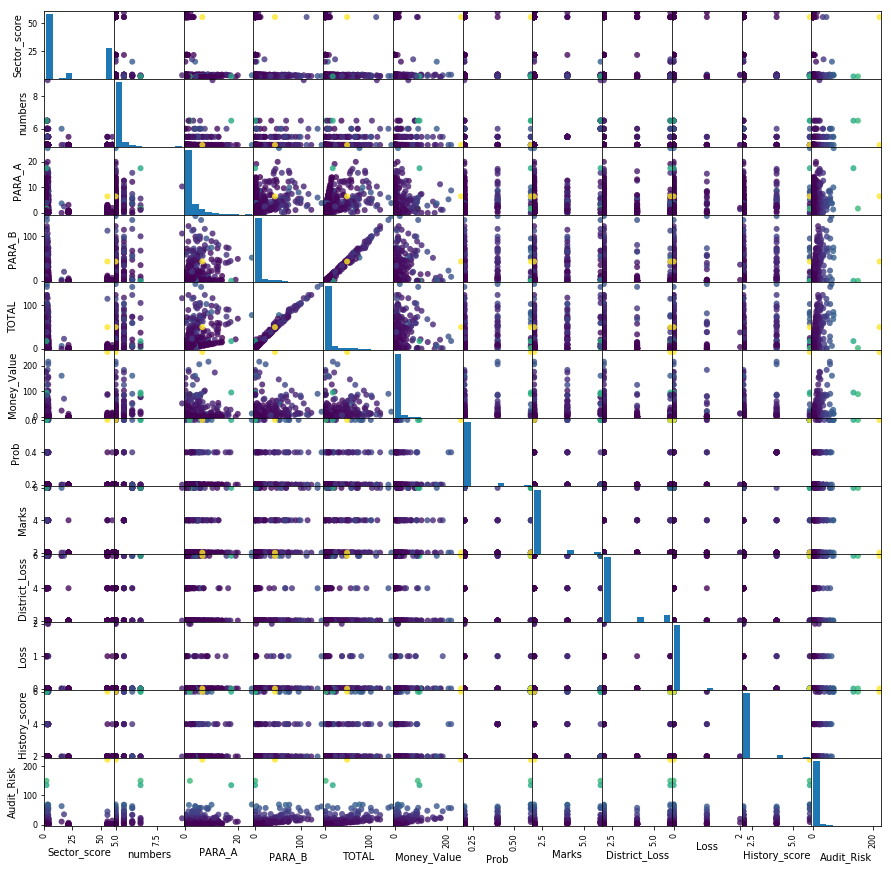

In [29]:
from pandas.plotting import scatter_matrix
X = data
y = data['Audit_Risk']
attributes = ['Sector_score','numbers','PARA_A', 'PARA_B',
       'TOTAL','Money_Value', 'Prob', 'Marks', 'District_Loss', 'Loss','History_score', 'Audit_Risk']
scatter_matrix(X[attributes], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')

# Regression Tasks

### Setting the target column

In [30]:
y = data['Audit_Risk']
X = data.drop(['Audit_Risk'], axis = 1)

### Splitting the data

In [31]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

### Scaling the data

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.fit_transform(X_test_org)

C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [33]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

lreg.fit(X_train, y_train)

print('Train score: %.4f'%lreg.score(X_train, y_train))
print('Test score: %.4f'%lreg.score(X_test, y_test))


Train score: 0.7902
Test score: 0.6397


Text(0.5, 0, 'RM')

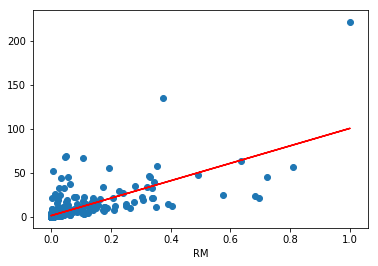

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,5].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

Text(0.5, 0, 'RM')

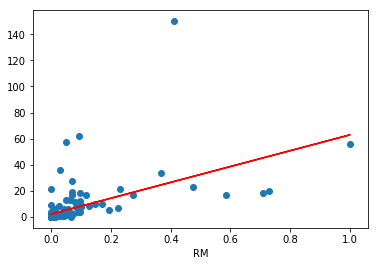

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

X_test_rm = X_test[:,5].reshape(-1,1)
lreg.fit(X_test_rm, y_test)
y_predict = lreg.predict(X_test_rm)

plt.plot(X_test_rm, y_predict, c = 'r')
plt.scatter(X_test_rm,y_test)
plt.xlabel('RM')

In [36]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

print(train_score_list)
print(test_score_list)

[0.7899808694783167, 0.7898953782889518, 0.78470016962494, 0.6957314738860834, 0.3678803496237012]
[0.6352221263809673, 0.6397715662181922, 0.6746582859124338, 0.6739959197786904, 0.37317148794947474]


Text(0.5, 0, '$\\alpha$')

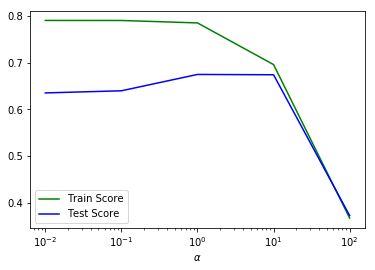

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

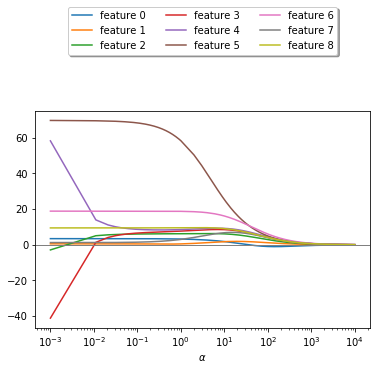

In [38]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,9):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [39]:
#Ridge with naive Grid search

from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []
best_score = 0
for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    score = ridge.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_parameters = {'x': alpha}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))



Best score: 0.67
Best parameters: {'x': 1}


In [40]:
#GRID SEARCH WITH CROSS VALIDATION:

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state = 0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=0)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

x_range = [0.01, 0.1, 1, 10, 100]
best_score = 0
for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    score = ridge.score(X_valid, y_valid)
    if score > best_score:
        best_score = score
        best_parameters = {'x': alpha}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
best = best_parameters['x']

ridge = Ridge(best)
ridge.fit(X_trainval, y_trainval)
test_score = ridge.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 423   size of validation set: 141   size of test set: 188

Best score on validation set: 0.75
Best parameters:  {'x': 100}
Test set score with best parameters: 0.63


In [41]:
from sklearn.model_selection import GridSearchCV
params={'alpha': [0.01, 0.1, 1, 10, 100]}
rdg_reg = Ridge()
grid_search = GridSearchCV(rdg_reg, params,cv=5,verbose = 1,return_train_score=True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [42]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 10}
Best cross-validation score: 0.71


In [43]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001714,0.001018,0.001530,0.001579,0.01,{'alpha': 0.01},-1.375575,0.675484,0.753789,0.691505,...,0.291645,0.834953,5,0.803367,0.797508,0.793157,0.816839,0.795923,0.801359,0.008430
1,0.001348,0.001481,0.001221,0.001510,0.1,{'alpha': 0.1},-0.723009,0.675448,0.753778,0.691498,...,0.422409,0.573955,4,0.803027,0.797508,0.793157,0.816838,0.795922,0.801290,0.008415
2,0.001802,0.001835,0.000205,0.000397,1,{'alpha': 1},0.489724,0.675108,0.753637,0.691372,...,0.665530,0.091937,3,0.798932,0.797500,0.793140,0.816802,0.795894,0.800454,0.008397
3,0.002558,0.002138,0.000200,0.000399,10,{'alpha': 10},0.722046,0.672405,0.750804,0.688091,...,0.711869,0.028109,1,0.794265,0.796964,0.792376,0.815344,0.794991,0.798788,0.008407
4,0.001053,0.001657,0.001000,0.001549,100,{'alpha': 100},0.789897,0.639007,0.714098,0.657344,...,0.703745,0.053131,2,0.770514,0.778111,0.772066,0.788677,0.773082,0.776490,0.006604


In [44]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))
    
print(train_score_list)
print(test_score_list)

[0.7899532084436698, 0.7884072748509698, 0.7738737045043502, 0.5831899773311493, 0.477343646656326]
[0.669066742759793, 0.6617677236125585, 0.6333215565475103, 0.3845842548973606, 0.338893525458584]


C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0.5, 0, '$\\alpha$')

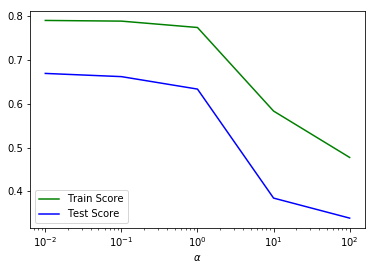

In [45]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

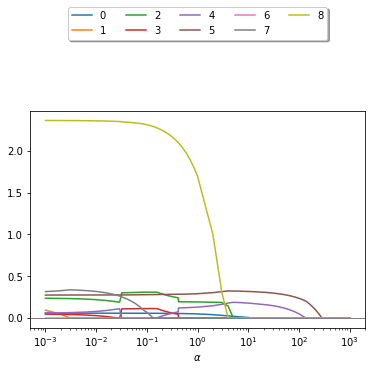

In [46]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,9):
    plt.plot(x_range, coeff[:,i], label = i)

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=5, fancybox=True, shadow=True)
plt.show()

In [47]:
#Lasso with Grid search

from  sklearn.linear_model import Lasso

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []
best_score = 0
for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    score = lasso.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_parameters = {'x': alpha}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.67
Best parameters: {'x': 0.01}


C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [48]:
from sklearn.model_selection import GridSearchCV
params={'alpha': [0.01, 0.1, 1, 10, 100]}
lso_reg = Lasso()
grid_search = GridSearchCV(lso_reg, params,cv=5,verbose = 1,return_train_score=True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
C:\Users\lav

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [49]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 1}
Best cross-validation score: 0.72


In [50]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000399,0.000489,0.000000,0.000000,0.01,{'alpha': 0.01},-0.520684,0.674242,0.753530,0.692976,...,0.463697,0.493462,4,0.802354,0.797494,0.793074,0.816630,0.795360,0.800982,0.008403
1,0.006300,0.007716,0.000200,0.000399,0.1,{'alpha': 0.1},0.732184,0.671401,0.756782,0.692776,...,0.714453,0.029864,2,0.792328,0.796410,0.791488,0.813446,0.794690,0.797673,0.008076
2,0.000919,0.001839,0.000000,0.000000,1,{'alpha': 1},0.801258,0.674967,0.726020,0.680957,...,0.721643,0.045213,1,0.778565,0.784354,0.775323,0.779826,0.780449,0.779703,0.002922
3,0.000200,0.000400,0.000000,0.000000,10,{'alpha': 10},0.575106,0.519174,0.501843,0.547243,...,0.493238,0.089147,3,0.585129,0.589367,0.607650,0.540699,0.608936,0.586356,0.024732
4,0.000599,0.000799,0.003084,0.004271,100,{'alpha': 100},0.501663,0.665879,0.435338,0.307985,...,0.408017,0.181509,5,0.492754,0.497080,0.500178,0.351143,0.517209,0.471673,0.060833


C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


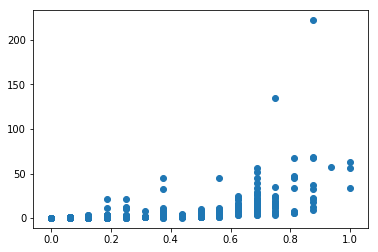

In [51]:
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.model_selection import train_test_split
X = merged[['Sector_score', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers','Money_Value', 'District_Loss','PROB','History','Score']]
y = merged ['Audit_Risk']
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.fit_transform(X_test_org)
X_train_1 = X_train[:,9].reshape(-1,1)
plt.scatter(X_train_1,y_train)

In [52]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))
    
print(train_score_list)
print(test_score_list)

[0.8115454368640814, 0.9980859422503378]
[0.5661939304902306, 0.8727062621667507]


Text(0, 0.5, 'R2-Score')

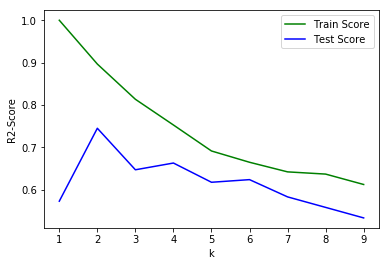

In [53]:
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('R2-Score')

In [54]:
print(train_score_array)
print(test_score_array)

[1.0, 0.8965969573216007, 0.8134585865826112, 0.752772054763097, 0.6914424171801434, 0.6648023805265182, 0.6421303910445303, 0.6368859971701157, 0.6123428760288555]
[0.5729305633875987, 0.7450513486278827, 0.6470637986921457, 0.6629872197156541, 0.6175970439601295, 0.6238087819114488, 0.5830909087104654, 0.5582988780829794, 0.5334520404460767]


In [55]:
param_grid_knn = {
            'leaf_size' : range(1,50),
            'n_neighbors' : range(1,50),
            'p': [1,2],
            'weights': ['distance','uniform'],
            }

CV_knn = GridSearchCV(estimator =knn_reg, param_grid = param_grid_knn , return_train_score=True, verbose = 1, n_jobs = -1)
CV_knn.fit(X_train, y_train)

best_parameters_knn=CV_knn.best_params_
print(best_parameters_knn)

C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 9604 candidates, totalling 28812 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1563 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 4563 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 8763 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 14163 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 20763 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 28563 tasks      | elapsed:  1.5min


{'leaf_size': 1, 'n_neighbors': 2, 'p': 2, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 28812 out of 28812 | elapsed:  1.5min finished


In [56]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(CV_knn.cv_results_)
# show the first 5 rows
display(results.head(10))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.002114,0.000130,0.004065,0.001222,1,1,1,distance,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 1, 'we...",0.382473,0.246507,0.617220,0.415400,0.153123,9115,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.003613,0.001091,0.004649,0.001521,1,1,1,uniform,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 1, 'we...",0.382473,0.246507,0.617220,0.415400,0.153123,9115,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.002739,0.001220,0.007623,0.002670,1,1,2,distance,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 2, 'we...",0.680256,0.556703,0.634167,0.623708,0.050979,442,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.003309,0.001162,0.009617,0.001294,1,1,2,uniform,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 2, 'we...",0.680256,0.556703,0.634167,0.623708,0.050979,442,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.001329,0.000470,0.005803,0.002101,1,2,1,distance,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 1, 'we...",0.667818,0.319898,0.679424,0.555713,0.166814,1520,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.002106,0.001569,0.004816,0.000373,1,2,1,uniform,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 1, 'we...",0.675266,0.321158,0.688133,0.561519,0.170042,1324,0.864599,0.899781,0.850447,0.871609,0.020741
6,0.001170,0.001033,0.021982,0.017719,1,2,2,distance,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 2, 'we...",0.766906,0.460827,0.702039,0.643257,0.131688,1,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.002129,0.000046,0.008369,0.002885,1,2,2,uniform,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 2, 'we...",0.763000,0.453819,0.689688,0.635502,0.131910,99,0.871260,0.898242,0.886231,0.885244,0.011038
8,0.002109,0.000876,0.006674,0.001016,1,3,1,distance,"{'leaf_size': 1, 'n_neighbors': 3, 'p': 1, 'we...",0.673768,0.317733,0.726801,0.572767,0.181631,1030,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.001345,0.000459,0.005187,0.000803,1,3,1,uniform,"{'leaf_size': 1, 'n_neighbors': 3, 'p': 1, 'we...",0.677681,0.319982,0.731337,0.576334,0.182587,981,0.731559,0.849996,0.730205,0.770587,0.056154


In [57]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
y_lin = svr_lin.fit(X_train, y_train).predict(X_test)


print("Coefficient shape: ", svr_lin.coef_.shape)
print("Intercept shape: ", svr_lin.intercept_.shape)

Coefficient shape:  (1, 10)
Intercept shape:  (1,)


On observation, we see that KNN Regressor gives us the best train and test scores for our data set.

### Classification Tasks 

In [58]:
data_c = merged[['PARA_A', 'PARA_B', 'numbers', 'Money_Value', 'Sector_score', 'History', 'District', 'Loss','Score', 'Risk']]

In [59]:
y = data_c['Risk']
X = data_c.drop(['Risk'], axis = 1)

In [60]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.fit_transform(X_test_org)

C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [62]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

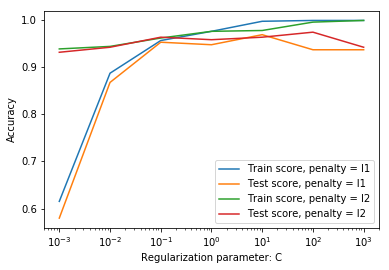

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


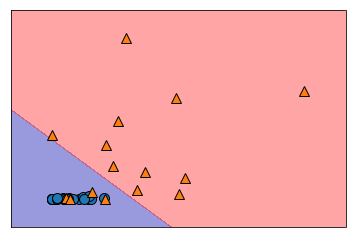

In [64]:
%matplotlib inline
import mglearn
X_b = X_train[10:50, [0,3]]
y_b = y_train[10:50]

lreg = LogisticRegression()
lreg.fit(X_b, y_b) 

mglearn.plots.plot_2d_separator(lreg, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

#X = merged[['Sector_score', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers','Money_Value', 'District_Loss','PROB','History','Score']]
#y = merged ['Risk']

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

log = LogisticRegression().fit(X_train, y_train)

log.pred = log.predict(X_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, log.pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, log.pred)))
print("Recall score:{:.3f}".format(recall_score(y_test, log.pred)))
print("Precision score: {:.3f}".format(precision_score(y_test, log.pred)))
print("ROC AUC score: {:.3f}".format(roc_auc_score(y_test, log.pred)))


Accuracy: 0.957
Confusion matrix:
[[106   3]
 [  5  74]]
Recall score:0.937
Precision score: 0.961
ROC AUC score: 0.955


C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [66]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

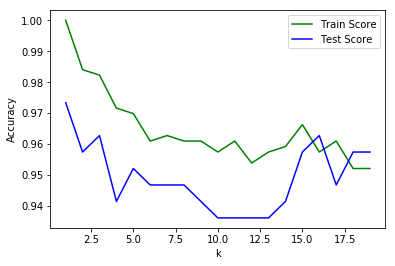

In [67]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [68]:
knn = KNeighborsClassifier(6)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.9610
Test score: 0.9468


In [69]:
knn_pred = knn.predict(X_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, knn_pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, knn_pred)))
print("Recall score:{:.3f}".format(recall_score(y_test, knn_pred)))
print("Precision score: {:.3f}".format(precision_score(y_test, knn_pred)))
print("ROC AUC score: {:.3f}".format(roc_auc_score(y_test, knn_pred)))

Accuracy: 0.947
Confusion matrix:
[[108   1]
 [  9  70]]
Recall score:0.886
Precision score: 0.986
ROC AUC score: 0.938


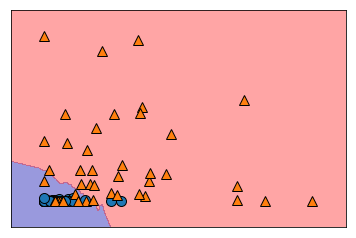

In [70]:
import mglearn
X_b = X_train[10:100, [0,3]]
y_b = y_train[10:100]

knn = KNeighborsClassifier(6)
knn.fit(X_b, y_b) 

mglearn.plots.plot_2d_separator(knn, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

In [71]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.957


In [72]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.970
Accuracy on test set: 0.931


In [73]:
dtree.pred = dtree.predict(X_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, dtree.pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, dtree.pred)))
print("Recall score:{:.3f}".format(recall_score(y_test, dtree.pred)))
print("Precision score: {:.3f}".format(precision_score(y_test, dtree.pred)))
print("ROC AUC score: {:.3f}".format(roc_auc_score(y_test, dtree.pred)))

Accuracy: 0.931
Confusion matrix:
[[106   3]
 [ 10  69]]
Recall score:0.873
Precision score: 0.958
ROC AUC score: 0.923


In [74]:
#KERNEL RBF
from sklearn.svm import SVC

print("Size of training set: {}   size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svc = SVC(kernel = 'rbf', gamma=gamma, C=C)
        svc.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svc.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))


Size of training set: 564   size of test set: 188
Best score: 0.98
Best parameters: {'C': 100, 'gamma': 0.1}


In [75]:
svc = SVC(kernel = 'rbf',C=100, gamma = 100)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, svc_pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, svc_pred)))
print("Recall score:{:.3f}".format(recall_score(y_test, svc_pred)))
print("Precision score: {:.3f}".format(precision_score(y_test, svc_pred)))
print("ROC AUC score: {:.3f}".format(roc_auc_score(y_test, svc_pred)))

Accuracy: 0.431
Confusion matrix:
[[  2 107]
 [  0  79]]
Recall score:1.000
Precision score: 0.425
ROC AUC score: 0.509


In [76]:
from sklearn.svm import SVC

print("Size of training set: {}   size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svml = SVC(kernel='linear', gamma=gamma, C=C)
        svml.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svml.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))


Size of training set: 564   size of test set: 188
Best score: 0.98
Best parameters: {'C': 10, 'gamma': 0.001}


In [77]:
svml = SVC(C=100, gamma = 0.001)
svml.fit(X_train, y_train)
svm_pred = svml.predict(X_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, svm_pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, svm_pred)))
print("Recall score:{:.3f}".format(recall_score(y_test, svm_pred)))
print("Precision score: {:.3f}".format(precision_score(y_test, svm_pred)))
print("ROC AUC score: {:.3f}".format(roc_auc_score(y_test, svm_pred)))

Accuracy: 0.963
Confusion matrix:
[[107   2]
 [  5  74]]
Recall score:0.937
Precision score: 0.974
ROC AUC score: 0.959


In [78]:
svcp = SVC(kernel='poly', degree=2, C = 10)
svcp.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [79]:
svcp.fit(X_train, y_train)
svcp.pred = svcp.predict(X_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, svcp.pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, svcp.pred)))
print("Recall score:{:.3f}".format(recall_score(y_test, svcp.pred)))
print("Precision score: {:.3f}".format(precision_score(y_test, svcp.pred)))
print("ROC AUC score: {:.3f}".format(roc_auc_score(y_test, svcp.pred)))

Accuracy: 0.926
Confusion matrix:
[[109   0]
 [ 14  65]]
Recall score:0.823
Precision score: 1.000
ROC AUC score: 0.911


In [80]:
pd.DataFrame(np.array([[accuracy_score(y_test, log.pred),accuracy_score(y_test, knn_pred),accuracy_score(y_test, dtree.pred),accuracy_score(y_test, svc_pred),accuracy_score(y_test, svm_pred)],
                       [recall_score(y_test, log.pred), recall_score(y_test, knn_pred), recall_score(y_test, dtree.pred),recall_score(y_test, svc_pred),recall_score(y_test, svm_pred)],
                           [precision_score(y_test, log.pred), precision_score(y_test, knn_pred), precision_score(y_test, dtree.pred), precision_score(y_test, svc_pred), precision_score(y_test, svm_pred)],
                           [roc_auc_score(y_test, log.pred), roc_auc_score(y_test, knn_pred), roc_auc_score(y_test, dtree.pred), roc_auc_score(y_test, svc_pred), roc_auc_score(y_test, svm_pred)]]), 
             columns=['Logistic Regression', 'KNN', 'Decision Tree', 'SVC-rbf', 'SVM'],
index=["accuracy", "recall", "precision", "ROC AUC score"]) 
                 

,Logistic Regression,KNN,Decision Tree,SVC-rbf,SVM
accuracy,0.957447,0.946809,0.930851,0.430851,0.962766
recall,0.936709,0.886076,0.873418,1.000000,0.936709
precision,0.961039,0.985915,0.958333,0.424731,0.973684
ROC AUC score,0.954593,0.938451,0.922947,0.509174,0.959180


On observation, Logistic Regression appears to have the highest Recall score here. We are concerned especially about recall here as we do not want to risk letting go companies with even the slightest possible chance of being fraudulent. 

Side note from the team: We believe merging of the Audit_Risk and trial data may not be essential as Score_A in Audit_Risk multiplied by 10 is the Score_A in trial. The same applies to Score_B. Audit_Risk dataset contains Risk_A(a derivative of PARA_A and Score_A) and Risk_B(a derivative of PARA_B and Score_B) which are not present in trial. TOTAL and numbers columns are identical in Audit_Risk and trial. Score_B.1 multiplied by 10 is the Marks column in trial. Audit_Risk has an extra column Risk_C( a derivative of numbers and Score_B.1) compared to trial. Score_MV in Audit_Risk multiplied by 10 is the Money_Marks column in trial dataset. Risk_D( a derivative of Money_Value and Score_MV) is absent in trial. PROB(probability of district loss score) in Audit_Risk multiplied by 10 is the Loss_Score in trial. prob(probability of historical loss score) in Audit_Risk multiplied by 10 is the History_Score in trial. Score is exactly identical in both Audit_risk and trial datasets. Risk column in trial is calculated based on Score value. If Score value is greater than 2, the firm is classified as 'risky'. For Score values less than or equal to 2, the firm is classified as not risky. By now, its clear that, all the columns in trial dataset are either exact replicas or result of minor transformations on the columns in Audit_Risk dataset. This invalidates the need to merge both datasets. The discrepancy in the Risk columns of Audit_Risk and trial datasets arises from the fact that Audit_Risk dataset uses Audit_Risk column(Product of Inherent_Risk, Controlled_Risk and Detection_Risk columns) to classify a firm as Risky or otherwise. If the Audit_Risk is greater than 1, the firm is classified as 'risky'. For Audit_Risk values less than or equal to 1, the firm is labelled 'Not Risky'. But we decided to go with the merging of datasets as we were adhering to the instructions given to us for the project.